### MSE - T-MachLe
# PW 05

{dorian.magnin, noemien.kocher}@master.hes-so.ch

## Exercice 1 Confusion Matrix

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import inv

classes = ['p0','p1','p2','p3','p4','p5','p6','p7','p8','p9','y']

dataset = pd.read_csv('data/ex1-system-a.csv', sep=';',
                        dtype={'y': np.uint32},
                        usecols=[0,1,2,3,4,5,6,7,8,9,10],
                        header=-1, names=classes)

N = len(dataset['p0'])
N_features = 10

print(dataset.loc[0:0].values[0][-1])

7.0


### a) Write a function to take classification decisions on such outputs according to Bayes’rule.

In [327]:
test = [0,1,20,3]

def classBayes(post_priors):
    return np.argmax(post_priors)


#print(classBayes(test))



### b) What is the overall error rate of the system ?

In [331]:
true_guess = 0

for i in range(0, N):
    row = dataset.loc[i:i].values[0] # get the row
    guess = classBayes(row[0:-1])
    if guess == row[-1]:
        true_guess = true_guess + 1
        
print("True guesses: ", true_guess)
print("Error rate: ", (N - true_guess)/N)
print("Performance: ", true_guess/N)

True guesses:  8927
Error rate:  0.1073
Performance:  0.8927


###  c) Compute and report the confusion matrix of the system.

In [334]:
from collections import defaultdict
cmatrix = defaultdict(lambda: [0] * N_features)


for i in range(N):
    row = dataset.loc[i:i].values[0] # get the row
    guess = classBayes(row[0:-1])
    yi = np.int(row[-1])
    cmatrix[classes[yi]][guess] = cmatrix[classes[yi]][guess] + 1
    

print(pd.DataFrame(cmatrix, columns=classes[:-1], index=classes[:-1]))

     p0    p1   p2   p3   p4   p5   p6   p7   p8   p9
p0  944     0   10    1    2   12   14    0   12   10
p1    0  1112    6    1    3    3    3   14   16    4
p2   11     2  921   31    6    6   21   30   18    6
p3    0     3   12  862    2   29    2    9   26   22
p4    0     1   15    2  910   19   22    7   24   53
p5    2     4    3   72    1  768   28    2   46   18
p6   10     3   19    5   12   19  865    1   22    0
p7    7     1   15   14    6    9    0  929   19   48
p8    5     9   26   12    4   21    3    3  772    4
p9    1     0    5   10   36    6    0   33   19  844


### d) What are the worst and best classes in terms of sensitivity (recall) ?

In [336]:
csensitivity = {}
crecall = {}

for i in range(N_features):
    # le hit
    TP = cmatrix[classes[i]][i]
    # sommer la ligne
    FN = sum(cmatrix[classes[j]][i] for j in range(N_features) ) - TP
    # sommer la colonne
    FP = sum(x for x in cmatrix[classes[i]]) - TP
    
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    csensitivity[classes[i]] = precision
    crecall[classes[i]] = recall
    
print("Sensitivity: ", pd.DataFrame(csensitivity, index=[0]).transpose())
print("Best sensitivity: ", max(csensitivity, key=csensitivity.get))

print("")

print("Recall: ", pd.DataFrame(crecall, index=[0]).transpose())
print("Best recall: ", max(crecall, key=crecall.get))

Sensitivity: 

            0
p0  0.963265
p1  0.979736
p2  0.892442
p3  0.853465
p4  0.926680
p5  0.860987
p6  0.902923
p7  0.903696
p8  0.792608
p9  0.836472
Best sensitivity:  p1

Recall:             0
p0  0.939303
p1  0.956971
p2  0.875475
p3  0.891417
p4  0.864198
p5  0.813559
p6  0.904812
p7  0.886450
p8  0.898719
p9  0.884696
Best recall:  p1


### e) In file `ex1-system-b.csv` you find the output of a second system B. What is the best system between (a) and (b) in terms of error rate and F1.

In [350]:
dataset2 = pd.read_csv('data/ex1-system-b.csv', sep=';',
                        dtype={'y': np.uint32},
                        usecols=[0,1,2,3,4,5,6,7,8,9,10],
                        header=-1, names=classes)

N2 = len(dataset2['p0'])

true_guess = 0

for i in range(0, N2):
    row = dataset2.loc[i:i].values[0] # get the row
    guess = classBayes(row[0:-1])
    if guess == row[-1]:
        true_guess = true_guess + 1
        
print("True guesses2: ", true_guess)
print("Error rate2: ", (N2 - true_guess)/N2)
print("Performance2: ", true_guess/N2)

True guesses2:  9613
Error rate2:  0.0387
Performance2:  0.9613


L'error rate est meilleurs avec ce dataset!

In [353]:
cmatrix2 = defaultdict(lambda: [0] * N_features)


for i in range(N2):
    row = dataset2.loc[i:i].values[0] # get the row
    guess = classBayes(row[0:-1])
    yi = np.int(row[-1])
    cmatrix2[classes[yi]][guess] = cmatrix2[classes[yi]][guess] + 1

csensitivity2 = {}
crecall2 = {}

for i in range(N_features):
    # le hit
    TP = cmatrix2[classes[i]][i]
    # sommer la ligne
    FN = sum(cmatrix2[classes[j]][i] for j in range(N_features) ) - TP
    # sommer la colonne
    FP = sum(x for x in cmatrix2[classes[i]]) - TP
    
    recall = TP / (TP + FN)
    precision = TP / (TP + FP)
    csensitivity2[classes[i]] = precision
    crecall2[classes[i]] = recall
    
print("Sensitivity2: ", pd.DataFrame(csensitivity2, index=[0]).transpose())
print("Best sensitivity2: ", max(csensitivity2, key=csensitivity.get))

print("")

print("Recall2: ", pd.DataFrame(crecall2, index=[0]).transpose())
print("Best recall2: ", max(crecall2, key=crecall2.get))

Sensitivity2:             0
p0  0.982653
p1  0.989427
p2  0.965116
p3  0.975248
p4  0.955193
p5  0.930493
p6  0.970772
p7  0.954280
p8  0.936345
p9  0.946482
Best sensitivity2:  p1

Recall2:             0
p0  0.969789
p1  0.984224
p2  0.950382
p3  0.924883
p4  0.968008
p5  0.971897
p6  0.955807
p7  0.967456
p8  0.963041
p9  0.958835
Best recall2:  p1


Je calcule le F1 de la meilleurs classification pour le dataset a et b et le compare:

In [165]:
F1a = 2 * (csensitivity['p1']*crecall['p1']) / \
      (csensitivity['p1']+crecall['p1'])

print("F1a: ", F1a)

F1b = 2 * (csensitivity2['p1']*crecall2['p1']) / \
      (csensitivity2['p1']+crecall2['p1'])

print("F1b: ", F1b)

F1a:  0.9682194166303876
F1b:  0.9868189806678382


Le dataset b est donc bien meilleurs.

## Exercice 2 Classification system

### a. Getting the training data

In [192]:
dataset = pd.read_csv('data/ex2-data-train.csv', names=['x1', 'x2', 'y'])

N = len(dataset['x1'])

x1 = dataset['x1'].values
x2 = dataset['x2'].values
y = dataset['y'].values


### b. Logistic regression classifier with linear decision boundary

#### a) Implement a sigmoid function. Use numpy to compute the exp so that your function can take numpy arrays as input. Plot the sigmoid function.

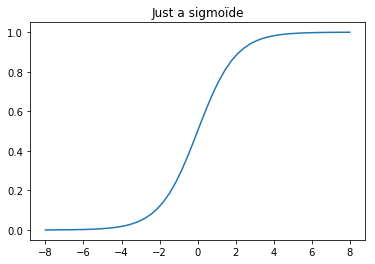

1.0


In [478]:
def sig(X):
    return 1.0 / (1.0 + np.exp(-X))

xs = np.linspace(-8, 8)

plt.plot(xs, sig(xs))
plt.title("Just a sigmoïde")
plt.show()

print(sig(200))

#### b) Implement the hypothesis function hθ(x)

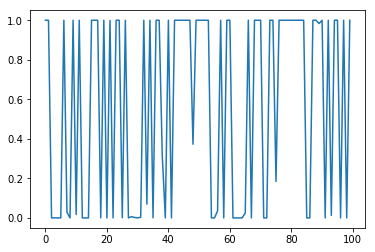

In [531]:
X = np.matrix( [np.ones(len(x1)), x1, x2] ).T

thethas = [0, -1, 1]

def h(Xn, thethas):
    result = []
    # Xn is like 
    # [ 
    #   [1 x10 x20], 
    #   [1 x11 x22] 
    # ]
    # thethas is like: [thetha0, thetha1, thetha2]
    return sig(np.matrix(Xn).dot(np.matrix(thethas).T))
    

plt.plot(np.arange(0, len(x1), 1), h(X, thethas))
plt.show()

#### c) Implement the objective function J(θ) :

In [641]:
thethas = [1, 1, 1]

def j(X, y, thethas):
    
    sum = 0
    for i in range(len(X)):
        sum = sum + y[i] * np.log(h(X[i], thethas).item(0)) + (1 - y[i]) * \
                                                  np.log(1 - h(X[i], thethas))
    sum = sum * 1.0 / N
    return sum.item(0)



#### d) In a similar way as in PW02 and PW03, implement the gradient ascent with the update rule :

In [568]:
N = len(x1)
X = np.matrix( [np.ones(len(x1)), x1, x2] ).T

thethas = [1, 1, 1]

def updateThetha(thethas, X, y, alpha, thethai=-1):
    thetharange = range(len(thethas))
    if thethai != -1:
        thetharange = [thethai]
    # for each thetha
    for l in thetharange:
        sum = 0
        # do the sum
        for i in range(N):
            sum = sum + (y[i] - h(X[i], thethas).item(0)) * X[i,l]
        sum = sum * alpha * 1.0 / N
        # update the thetha
        thethas[l] = thethas[l] + sum
        
    return thethas

for i in range(10):
    thethas = updateThetha(thethas, X, y, 0.000001)

print(thethas)

[0.99999500000000041, 0.99976484199182392, 0.99971816233712674]


#### e) Test your implementation by observing the evolution of the objective function `J(thetha)` during the gradient ascent

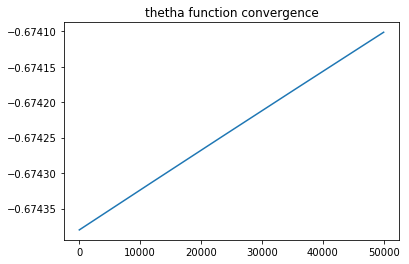

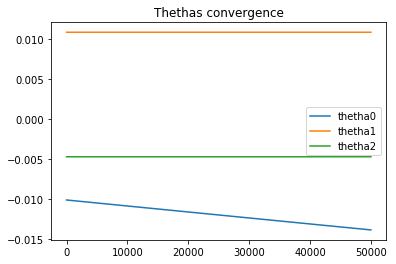

Théthas:  [-0.013844793527077574, 0.010812747166791963, -0.004720855010131351]


In [570]:
results = []
steps = 50000

thethas = [0, 0, 0]
# après 15000
thethas = [-0.0010939110746739354, 0.0087227663757557319, -0.0030173491474521884]
# après 10000
thethas = [-0.0018466122230984753, 0.0099659937736634435, -0.0040992829381749658]
# après 10000
thethas = [-0.002598695947319265, 0.010452841979434073, -0.0045155857644742633]
# après 100'000
thethas = [-0.010112392859010402, 0.010812747166791963, -0.004720855010131351]
# À ce stade, je remarque que thetha0 ne converge pas encore. Je relance donc
# juste pour thetha0
# après 50000 juste pour thetha0
thethas = [-0.013844793527077574, 0.010812747166791963, -0.004720855010131351]

thethas0 = []
thethas1 = []
thethas2 = []

for i in range(steps):
    thethas = updateThetha(thethas, X, y, 0.000001, thethai=0)
    results.append(j(X, y, thethas))
    thethas0.append(thethas[0])
    thethas1.append(thethas[1])
    thethas2.append(thethas[2])
    
plt.plot(np.arange(0, steps, 1), results)
plt.title('thetha function convergence')
plt.show()

xss = np.arange(0, len(thethas0), 1)
plt.plot(xss, thethas0, label="thetha0")
plt.plot(xss, thethas1, label="thetha1")
plt.plot(xss, thethas2, label="thetha2")
plt.legend()
plt.title("Thethas convergence")
plt.show()

print("Théthas: ", thethas)

#### f) Compute the correct classification rate on ex2-data-test.csv after convergence assu- ming you have an estimator of the posterior probabilities with 

`P(yn = 1|xn;θ) = hθ(xn)`  
`P(yn =0|xn;θ)=1−hθ(xn)` 

In [588]:
dataset = pd.read_csv('data/ex2-data-test.csv', names=['x1', 'x2', 'y'])

N = len(dataset['x1'])

x1 = dataset['x1'].values
x2 = dataset['x2'].values
y = dataset['y'].values

ones_x1 = [x1[i] for i in range(0, N) if y[i] == 1]
ones_x2 = [x2[i] for i in range(0, N) if y[i] == 1]

zero_x1 = [x1[i] for i in range(0, N) if y[i] == 0]
zero_x2 = [x2[i] for i in range(0, N) if y[i] == 0]

thethas = [-0.013844793527077574, 0.010812747166791963, -0.004720855010131351]
N = len(x1)

true_guess = 0
for i in range(len(x1)):
    prob1 = h([1, x1[i], x2[i]], thethas)
    prob0 = 1 - prob1
    guess = 1
    if prob0 > prob1:
        guess = 0
    if y[i] == guess:
        true_guess = true_guess + 1

print("Performance: ", true_guess / N)
print("Error rate: ", (N - true_guess) / N)

Performance:  0.6
Error rate:  0.4


#### g) Draw the decision boundary of your system on top of the scatter plot of the testing data.

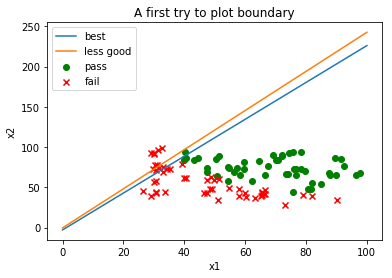

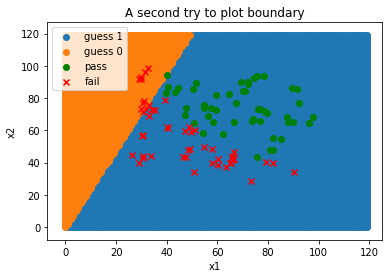

In [635]:
thethas = [-0.013844793527077574, 0.010812747166791963, -0.004720855010131351]

# on a donc thetha0, thetha1, thetha2
# notre droite est donc thetha2*x2 = -thetha1*x1 - thetha0

def bound(x1):
    return (-thethas[1]*x1 - thethas[0]) * 1.0 / thethas[2]

plt.plot(np.linspace(0,100), bound(np.linspace(0,100)), label="best")

thethas = [-0.0018466122230984753, 0.0099659937736634435, -0.0040992829381749658]
plt.plot(np.linspace(0,100), bound(np.linspace(0,100)), label="less good")
plt.scatter(ones_x1, ones_x2, marker="o", label="pass", color="green")
plt.scatter(zero_x1, zero_x2, marker="x", label="fail", color="red")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title("A first try to plot boundary")
plt.show()

square = 120

x1s = np.arange(0, square, 1)
x2s = np.arange(0, square, 1)

onepx = []
onepy = []
zeropx = []
zeropy = []

for ix in range(0, square):
    for iy in range(0, square):
        prob1 = h( np.matrix([1, ix, iy]), thethas )
        prob0 = 1 - prob1
        guess = 1
        if prob0 > prob1:
            guess = 0
        if guess == 1:
            onepx.append(ix)
            onepy.append(iy)
        else:
            zeropx.append(ix)
            zeropy.append(iy)

plt.scatter(onepx, onepy, label="guess 1")
plt.scatter(zeropx, zeropy, label="guess 0")
plt.scatter(ones_x1, ones_x2, marker="o", label="pass", color="green")
plt.scatter(zero_x1, zero_x2, marker="x", label="fail", color="red")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title("A second try to plot boundary")
plt.show()

The decision boundary is quite wrong. We suppose that either our process is wrong or we neeed mor iterations. The iteration process took a long time, about an hour!

#### h) Compare the performance of the logistic regression system with the ones of previous’s week.

Here we have a performance of 60%. In the other work, we had a performance of about 91%. But we think that more iterations would bring better results.
### c. Logistic regression classifier with non-linear decision boundary

Redo the experiments of 2.b by increasing the complexity of the model in order to have a non-linear decision boundary.


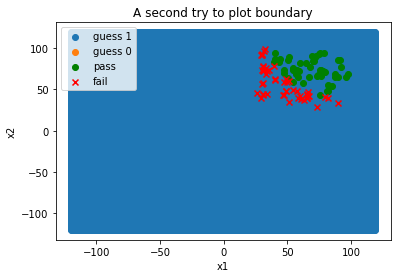

In [639]:
thethas = [0, 0, 0, 0, 0, 0]

def h(Xn, thethas):
    result = []
    # Xn is like 
    # [ 
    #   [1 x10 x20 x10^2 x20^2 x10x20], 
    #   [1 x11 x21 x11^2 x21^2 x11x21], 
    # ]
    # thethas is like: [thetha0, thetha1, thetha2, ... thetha5]
    return sig(np.matrix(Xn).dot(np.matrix(thethas).T))

def updateThetha(thethas, X, y, alpha, thethai=-1):
    thetharange = range(len(thethas))
    if thethai != -1:
        thetharange = [thethai]
    # for each thetha
    for l in thetharange:
        sum = 0
        # do the sum
        for i in range(N):
            sum = sum + (y[i] - h(X[i], thethas).item(0)) * X[i,l]
        sum = sum * alpha * 1.0 / N
        # update the thetha
        thethas[l] = thethas[l] + sum
        
    return thethas

steps = 10000

thethas = [0, 0, 0, 0, 0, 0]

dataset = pd.read_csv('data/ex2-data-train.csv', names=['x1', 'x2', 'y'])

N = len(dataset['x1'])

x1 = dataset['x1'].values
x2 = dataset['x2'].values
y = dataset['y'].values

X = np.matrix( [np.ones(len(x1)), x1, x2, x1*x1, x2*x2, x1*x2] ).T

for i in range(steps):
    thethas = updateThetha(thethas, X, y, 0.00001, thethai=0)
    
    
# ------------- Plot
square = 120

x1s = np.arange(-square, square, 1)
x2s = np.arange(-square, square, 1)

onepx = []
onepy = []
zeropx = []
zeropy = []

for ix in range(-square, square):
    for iy in range(-square, square):
        prob1 = h( np.matrix([1, ix, iy, ix*ix, iy*iy, ix*iy]), thethas )
        prob0 = 1 - prob1
        guess = 1
        if prob0 > prob1:
            guess = 0
        if guess == 1:
            onepx.append(ix)
            onepy.append(iy)
        else:
            zeropx.append(ix)
            zeropy.append(iy)

plt.scatter(onepx, onepy, label="guess 1")
plt.scatter(zeropx, zeropy, label="guess 0")
plt.scatter(ones_x1, ones_x2, marker="o", label="pass", color="green")
plt.scatter(zero_x1, zero_x2, marker="x", label="fail", color="red")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title("A second try to plot boundary")
plt.show()

Our more complex model is not better!